In [1]:
import pandas as pd
import numpy as np
import warnings


# Get the DataSet

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("ml-100k/u.data",sep='\t',names=["USER_ID","ITEM_ID","RATING","TIMESTAMP"])

In [4]:
df.head() 

,USER_ID,ITEM_ID,RATING,TIMESTAMP
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
df.shape

(100000, 4)

In [6]:
df['USER_ID'].nunique()

943

In [7]:
df['ITEM_ID'].nunique()

1682

In [8]:
df2=pd.read_csv("ml-100k/u.item",sep="\|",header=None,encoding='cp1252')

In [9]:
df2=df2[[0,1]]

In [10]:
# df2.columns

In [11]:
df2.columns=['ITEM_ID','TITLE']

In [12]:
# df2.columns

In [13]:
df=pd.merge(df,df2,on="ITEM_ID")
# pd.read_csv?

# Exploratory Data Analysis

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [15]:
lp=df.groupby('TITLE').describe()['RATING']

In [29]:
lp.sort_values(ascending=False,by='count')


,count,mean,std,min,25%,50%,75%,max
TITLE,,,,,,,,
Star Wars (1977),583.0,4.358491,0.881341,1.0,4.0,5.0,5.0,5.0
Contact (1997),509.0,3.803536,0.994427,1.0,3.0,4.0,5.0,5.0
Fargo (1996),508.0,4.155512,0.975756,1.0,4.0,4.0,5.0,5.0
Return of the Jedi (1983),507.0,4.007890,0.923955,1.0,3.0,4.0,5.0,5.0
Liar Liar (1997),485.0,3.156701,1.098544,1.0,3.0,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
"Great Day in Harlem, A (1994)",1.0,5.000000,NaN,5.0,5.0,5.0,5.0,5.0
"Other Voices, Other Rooms (1997)",1.0,3.000000,NaN,3.0,3.0,3.0,3.0,3.0
Good Morning (1971),1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0


In [27]:
df=df.groupby('TITLE')

AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

In [16]:
lp

,count,mean,std,min,25%,50%,75%,max
TITLE,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Young Guns II (1990),44.0,2.772727,1.008421,1.0,2.00,3.0,3.0,5.0
"Young Poisoner's Handbook, The (1995)",41.0,3.341463,1.237129,1.0,3.00,4.0,4.0,5.0
Zeus and Roxanne (1997),6.0,2.166667,0.983192,1.0,1.25,2.5,3.0,3.0


In [20]:
# Plot the historam of the column count

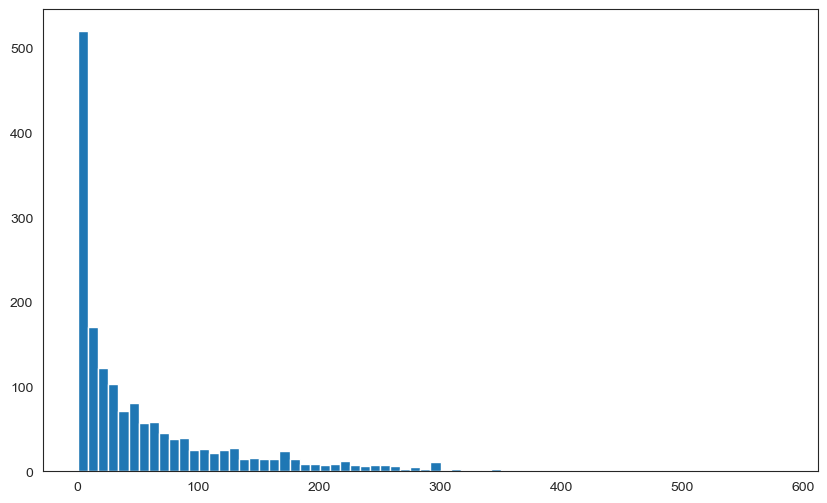

In [30]:
plt.figure(figsize=(10,6))
plt.hist(lp['count'],bins=70)
plt.show()

In [23]:
plt.hist?

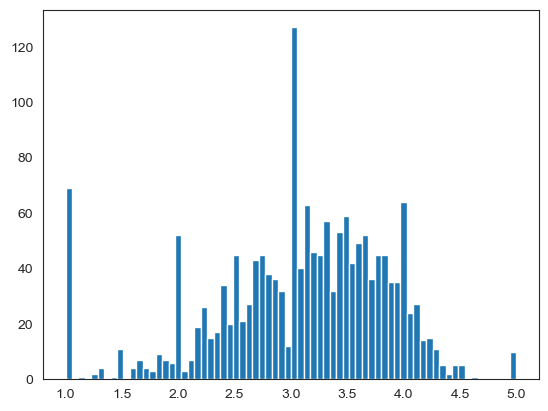

In [31]:
plt.hist(lp['mean'],bins=70)
plt.show()

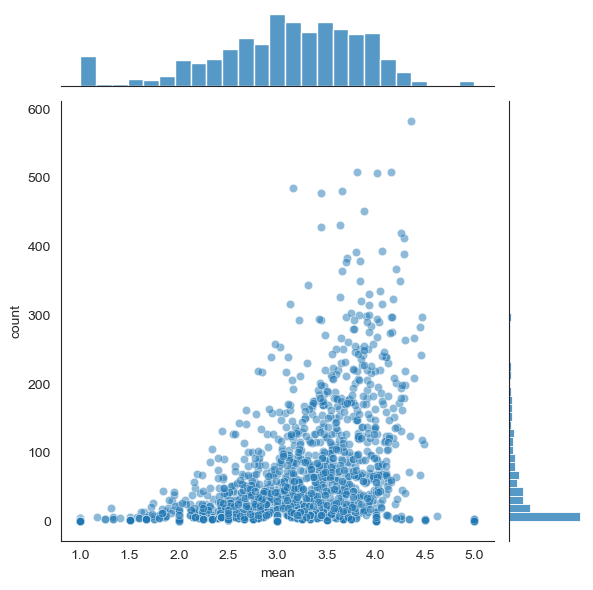

In [32]:
sns.jointplot(x=lp['mean'],y=lp['count'],alpha=0.5)

# Creating Movie Recommendation

In [33]:
df.head()

,USER_ID,ITEM_ID,RATING,TIMESTAMP,TITLE
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [34]:
 moviemat=df.pivot_table(index="USER_ID",columns="TITLE",values='RATING')

In [36]:
moviemat.head(n=10)

TITLE,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
USER_ID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
ratings={}
ratings['rating']=lp['mean']

In [39]:
ratings['num of rating']=lp['count']

In [42]:
ratings=pd.DataFrame(ratings)

In [44]:
ratings.head()

,rating,num of rating
TITLE,,
'Til There Was You (1997),2.333333,9.0
1-900 (1994),2.600000,5.0
101 Dalmatians (1996),2.908257,109.0
12 Angry Men (1957),4.344000,125.0
187 (1997),3.024390,41.0


# Sort the values according to the highest num of rating.

In [45]:
ratings.sort_values(ascending=False,by='num of rating')

,rating,num of rating
TITLE,,
Star Wars (1977),4.358491,583.0
Contact (1997),3.803536,509.0
Fargo (1996),4.155512,508.0
Return of the Jedi (1983),4.007890,507.0
Liar Liar (1997),3.156701,485.0
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1.0
"Other Voices, Other Rooms (1997)",3.000000,1.0
Good Morning (1971),1.000000,1.0


### We get that star war is the movie which has watched by 583 peoples.

In [66]:
clear

In [47]:
starwars_UserRatings=moviemat['Star Wars (1977)']

In [48]:
starwars_UserRatings.head()

USER_ID
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [51]:
similar_to_starwars=moviemat.corrwith(starwars_UserRatings)

In [52]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['Correlation'])

In [54]:
corr_starwars.dropna(inplace=True)

In [56]:
corr_starwars.head(n=10)

,Correlation
TITLE,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


In [58]:
corr_starwars.sort_values(by='Correlation',ascending=False)

,Correlation
TITLE,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


In [67]:
   corr_starwars

,Correlation
TITLE,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [69]:
corr_starwars=corr_starwars.join(ratings['num of rating'])

In [70]:
corr_starwars.head()

,Correlation,num of rating
TITLE,,
'Til There Was You (1997),0.872872,9.0
1-900 (1994),-0.645497,5.0
101 Dalmatians (1996),0.211132,109.0
12 Angry Men (1957),0.184289,125.0
187 (1997),0.027398,41.0


In [74]:
corr_starwars[corr_starwars['num of rating']>100].sort_values(by='Correlation',ascending=False)

,Correlation,num of rating
TITLE,,
Star Wars (1977),1.000000,583.0
"Empire Strikes Back, The (1980)",0.747981,367.0
Return of the Jedi (1983),0.672556,507.0
Raiders of the Lost Ark (1981),0.536117,420.0
Austin Powers: International Man of Mystery (1997),0.377433,130.0
...,...,...
"Edge, The (1997)",-0.127167,113.0
As Good As It Gets (1997),-0.130466,112.0
Crash (1996),-0.148507,128.0


## Predict Function

In [76]:
def predictMovies(movie_name):
    movie_user_ratings=moviemat[movie_name]
    similar_to_movie=moviemat.corrwith(movie_user_ratings)
    corr_movie=pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie=corr_movie.join(ratings['num of rating'])
    prediction=corr_movie[corr_movie['num of rating']>100].sort_values(by='Correlation',ascending=False)
    return prediction
    

In [77]:
predictMovies('Star Wars (1977)')

,Correlation,num of rating
TITLE,,
Star Wars (1977),1.000000,583.0
"Empire Strikes Back, The (1980)",0.747981,367.0
Return of the Jedi (1983),0.672556,507.0
Raiders of the Lost Ark (1981),0.536117,420.0
Austin Powers: International Man of Mystery (1997),0.377433,130.0
...,...,...
"Edge, The (1997)",-0.127167,113.0
As Good As It Gets (1997),-0.130466,112.0
Crash (1996),-0.148507,128.0


# Trained Model


In [78]:
predictMovies('Titanic (1997)')

,Correlation,num of rating
TITLE,,
Titanic (1997),1.000000,350.0
"River Wild, The (1994)",0.497600,146.0
"Abyss, The (1989)",0.472103,151.0
Bram Stoker's Dracula (1992),0.443560,120.0
True Lies (1994),0.435104,208.0
...,...,...
Raging Bull (1980),-0.223660,116.0
Jackie Brown (1997),-0.236841,126.0
Brazil (1985),-0.243532,208.0
